# Exploratory Data Analysis of 10,000 Movies

## Dataset Information

I am using the Kaggle dataset: [10000 latest movies datasets 2025](https://www.kaggle.com/datasets/praveensoni06/1500-latest-movies-datasets-2025).

Although the dataset is titled "latest movies 2025," I noticed that it contains movies dating back to 1897 and some future releases up to 2027. Based on the fields like release date, popularity, and votes, I believe this is a general movie metadata collection, likely pulled from TMDB or IMDb.


## Analysis Goals
This dataset is suitable for analyzing trends over time. I will examine:

- Number of movies released by decade, year, month, and day  
- Original language distribution  
- Vote average distribution  
- Correlation between votes and popularity  

## Notes / Limitations
- The analysis reflects only this dataset and **does not represent the total number of movies released** historically.  
- Some movies are announced future releases with zero votes, which may affect trends for upcoming years.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../scripts/')

import pandas as pd
import matplotlib.pyplot as plt
import data
import plots

df = data.load_data('../data/cleaned/cleaned_movies.csv')
df.head()

,#,title,release_date,original_language,popularity,vote_count,vote_average,release_year,release_month,release_day
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,2025,10,15
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,2025,10,14
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,2025,7,11
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,2025,7,29
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,2025,9,3


In [2]:
len(df)

9951

In [3]:
df.describe()

,#,popularity,vote_count,vote_average,release_year,release_month,release_day
count,9951.000000,9951.000000,9951.000000,9951.000000,9951.000000,9951.000000,9951.000000
mean,4990.870465,7.096713,1477.731384,5.565219,2002.791277,6.718219,14.949854
std,2886.267899,16.418277,3412.302452,2.391956,24.283968,3.526068,9.045524
min,0.000000,2.616700,0.000000,0.000000,1897.000000,1.000000,1.000000
25%,2491.500000,4.502700,5.000000,5.200000,1994.000000,4.000000,7.000000
50%,4988.000000,4.981400,74.000000,6.300000,2012.000000,7.000000,15.000000
75%,7487.500000,6.176150,1189.000000,7.019000,2021.000000,10.000000,23.000000
max,9999.000000,1096.665400,38078.000000,10.000000,2027.000000,12.000000,31.000000


This notebook is using the cleaned version of the csv file. In the cleaning, any null values that existed dropped the entry. Null values were located only in the release date column and the overview column. Since the overview will not be needed for this analysis, that column was dropped before dropping the rows. After the cleaning, the csv remained with 49 less rows due to the lack of release dates which will be very important.

### Correlation Plots

In [4]:
%matplotlib inline

In [5]:
df.head()

,#,title,release_date,original_language,popularity,vote_count,vote_average,release_year,release_month,release_day
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,2025,10,15
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,2025,10,14
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,2025,7,11
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,2025,7,29
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,2025,9,3


In [6]:
years = df.groupby('release_year').size()
decades = years.groupby((years.index // 10) * 10).sum()
years

release_year
1897      5
1898      1
1900      3
1902      3
1903      4
       ... 
2023    444
2024    619
2025    753
2026     25
2027      5
Length: 127, dtype: int64

In [7]:
decades

release_year
1890       6
1900      18
1910      70
1920      92
1930     153
1940     154
1950     230
1960     355
1970     495
1980     607
1990     874
2000    1514
2010    2602
2020    2781
dtype: int64

It should be noted that the decades 1890 and 2020 are at a slight disadvantage due to the decade 1890 having data only going so far back as 1897 and 2020 having data to 2027, leaving both these decades without data from all 10 years.

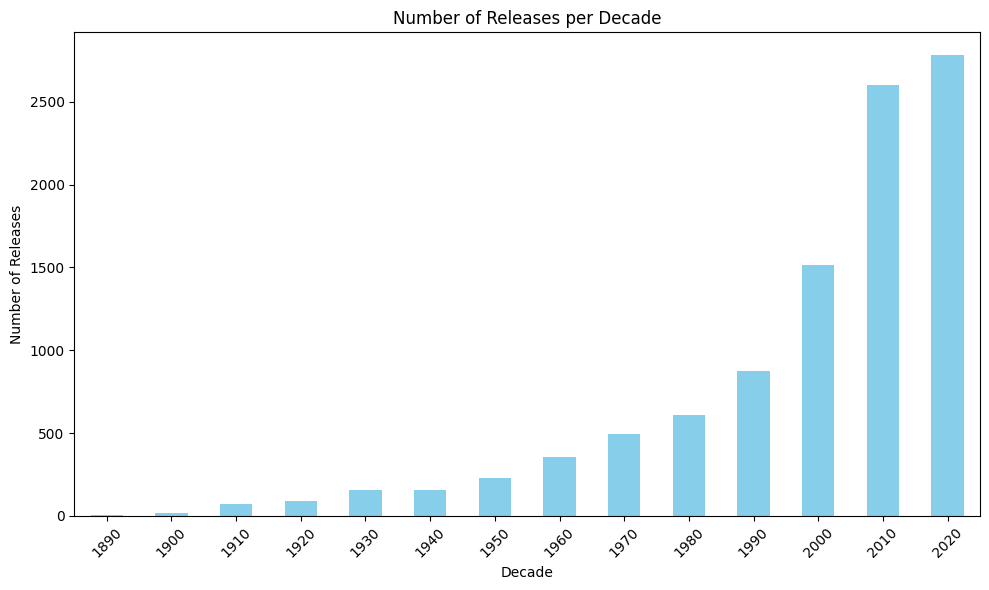

In [14]:
fig = plots.plot_decades(df)
plt.show()

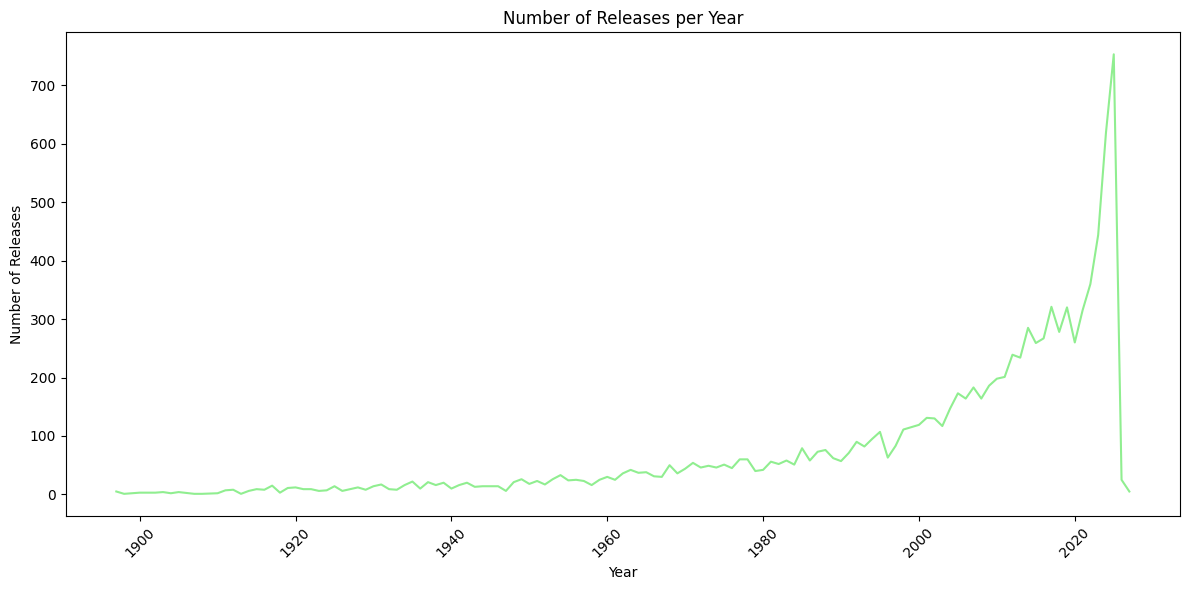

In [15]:
fig = plots.plot_years(df)
plt.show()

In [16]:
months = df.groupby('release_month').size()
months

release_month
1      998
2      596
3      823
4      697
5      721
6      819
7      748
8      782
9      956
10    1058
11     825
12     928
dtype: int64

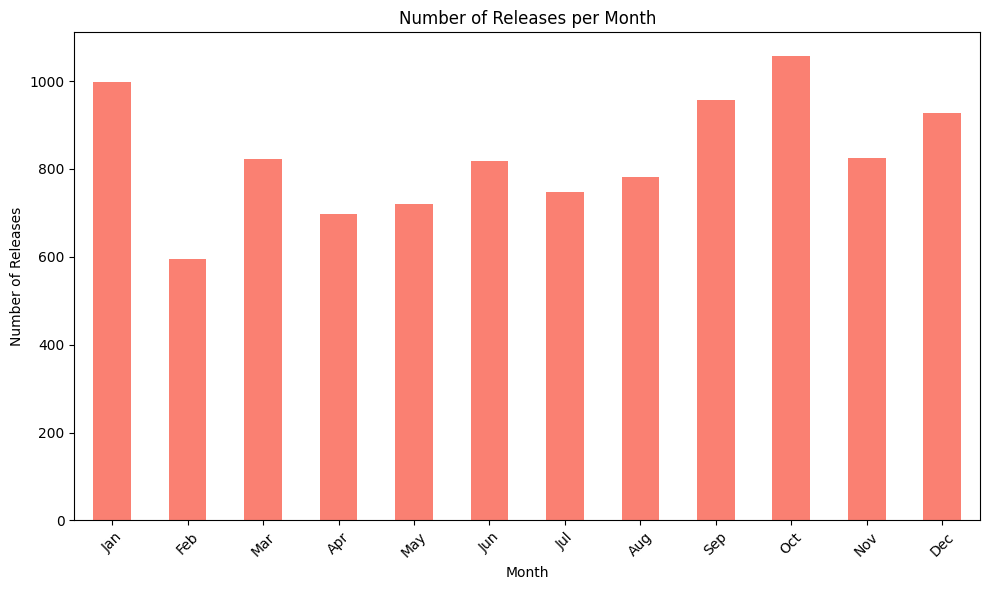

In [17]:
fig = plots.plot_months(df)
plt.show()


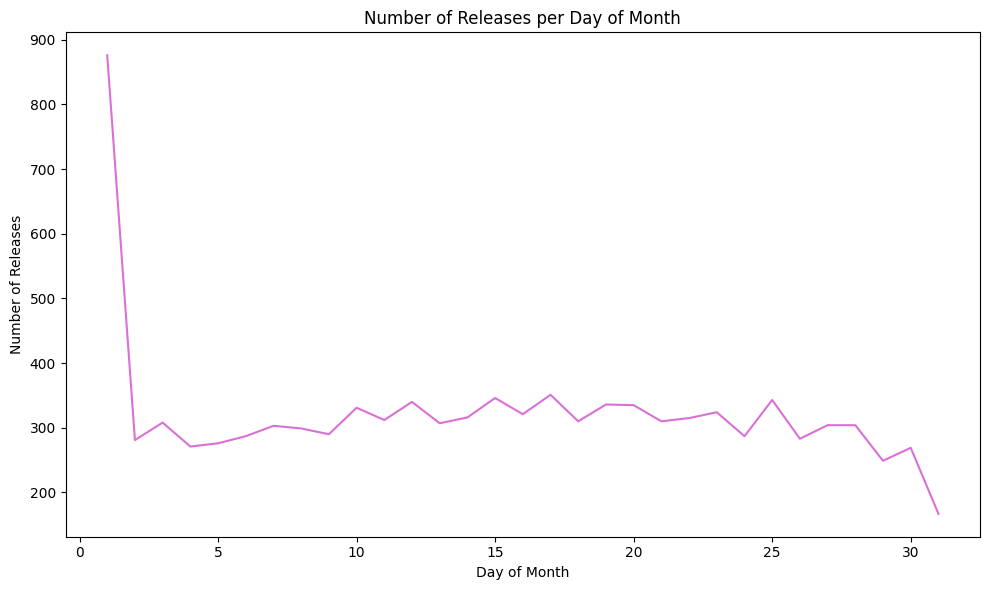

In [18]:
fig = plots.plot_days(df)
plt.show()

## Releases over time

- With this particular dataset, the concentration of movie releases has steadily increased over time. Closer to 2025, it is clear there are more movies present in the dataset.
- When analyzing the entire dataset, there is no dominating month for movie releases. While there is a stark difference in October, the month with the most movie releases, and February, the one with the least, the other 10 months fill in that gap to leave no month as a major outlier. There does not appear to be a trend in release month either as the months go up and down quite frequently.
- The day plot is interesting because there is an apparent trend in what day of the month movies release. Over all the years available in the dataset, clearly these movies tend to release on the first day of the month by a large margin. The rest of the days seem to have similar release amounts, besides Day 31 which has the least, most likely due to the lack of months with 31 days.

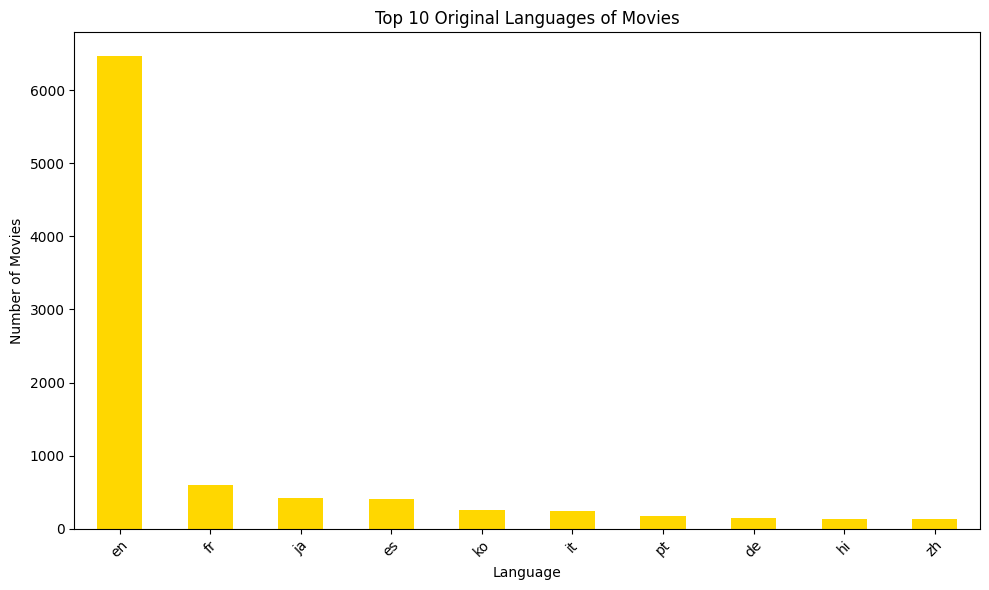

In [19]:
fig = plots.plot_langs(df)
plt.show()

## Languages

In this dataset, the majority of movies had English as their original language. Very few movies are in a language that is not English. This could be due to many factors like English being a prominent language in the world or how the movies in the dataset were chosen to name a couple.

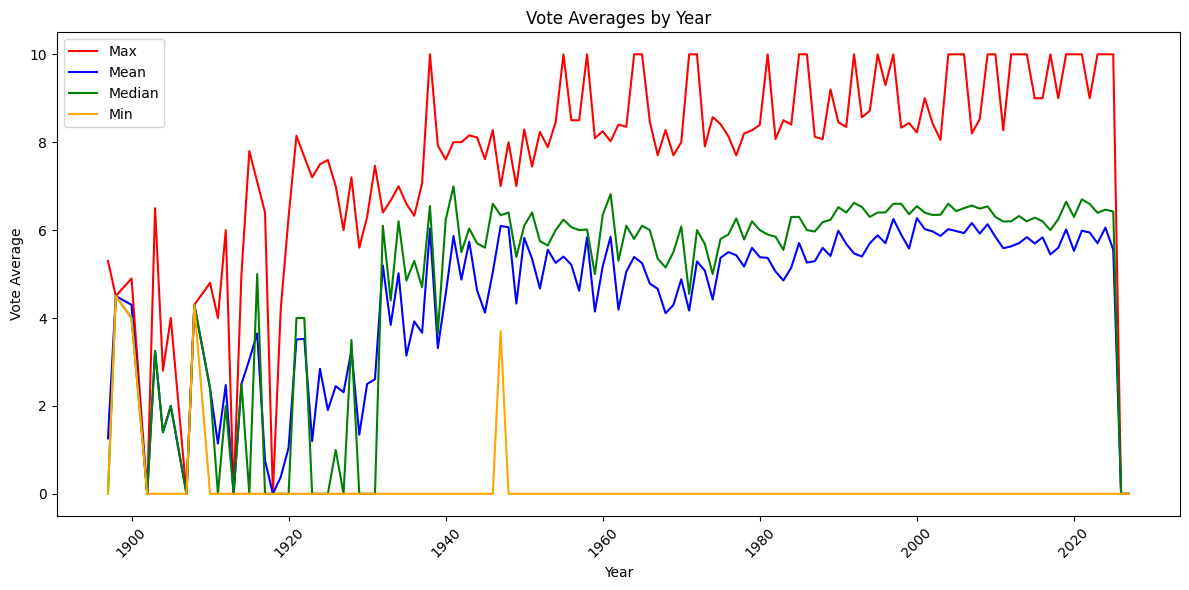

In [20]:
fig = plots.plot_votes(df)
plt.show()


## Vote Average

Besides the chaos in all four metrics before 1930, movies after then continued to have similar average ratings. Pre-1930, there were no movies with an average vote over 8. Afterwards, the highest average vote for many years was 10. Considering the vote could not be more than 10, this is a very interesting insight that could either mean the movie had very few votes or was astounding. The votes significantly drop towards the very end due to the presence of unreleased movies in the dataset, none of which have votes. 

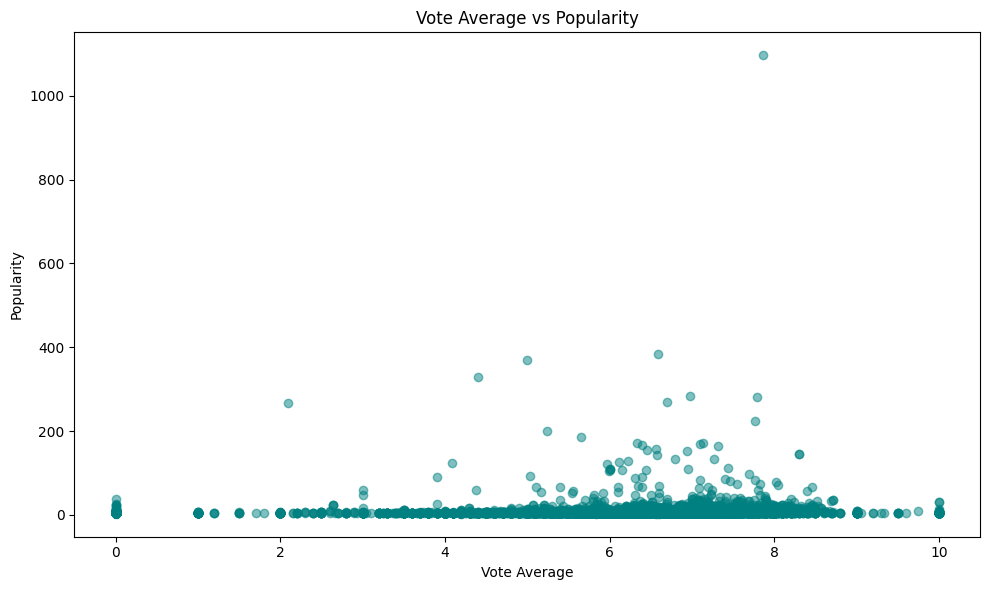

In [21]:
fig = plots.plot_votes_popularity(df)
plt.show()

## Vote Average vs Popularity

There is no strong correlation between popularity and vote average. There are popular movies with average votes of 10 and 0. The most popular movie has an average vote of 7.869. The only insight that could be gathered from this is the quantity of movies increased as the average vote increases.

## Key Insights

- Movie releases are heavily concentrated in recent decades, reflecting dataset bias.
- English dominates original language counts, with a long tail of other languages.
- Vote averages (after 1930) remain relatively stable over time despite large changes in release volume.
- Popularity and vote average show only a weak relationship, suggesting popularity is not
  solely driven by user ratings.